In [1]:
%matplotlib widget
import numpy as np
import skimage.filters
import skimage.color
import skimage.io
import matplotlib.pyplot as plt

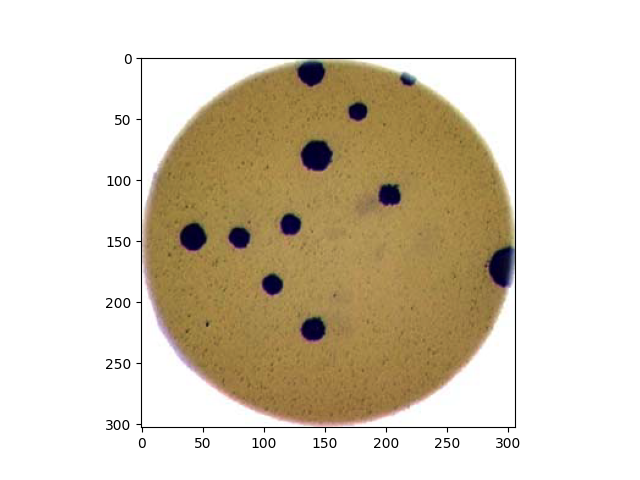

In [2]:
#imagen a utilizar
bacteria_image = skimage.io.imread(fname="colonies-01.tif")

#mostrar la imagen
fig, ax = plt.subplots()
plt.imshow(bacteria_image)
plt.show()

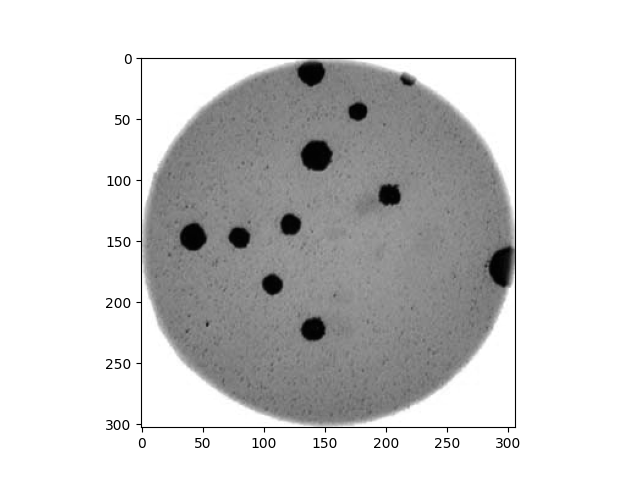

In [3]:
gray_bacteria = skimage.color.rgb2gray(bacteria_image)

#imagen en escala de grisis
fig, ax = plt.subplots()
plt.imshow(gray_bacteria, cmap="gray")
plt.show()

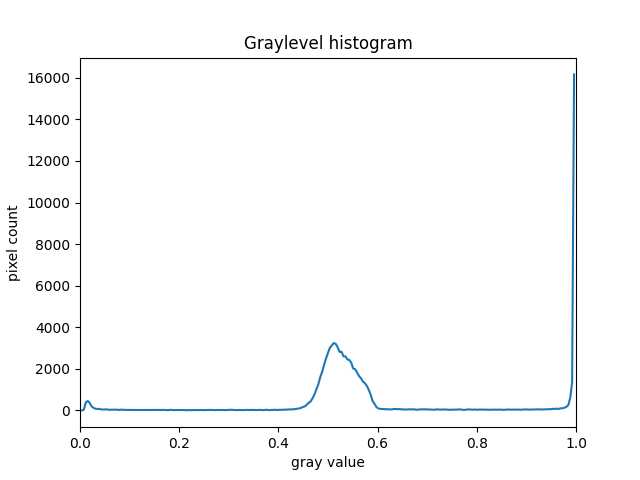

In [5]:
#identificar los pixeles en escala de grisis para saber donde se encuentran las colonias de bacterias en la imagen
blurred_image = skimage.filters.gaussian(gray_bacteria, sigma=1.0)
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show()

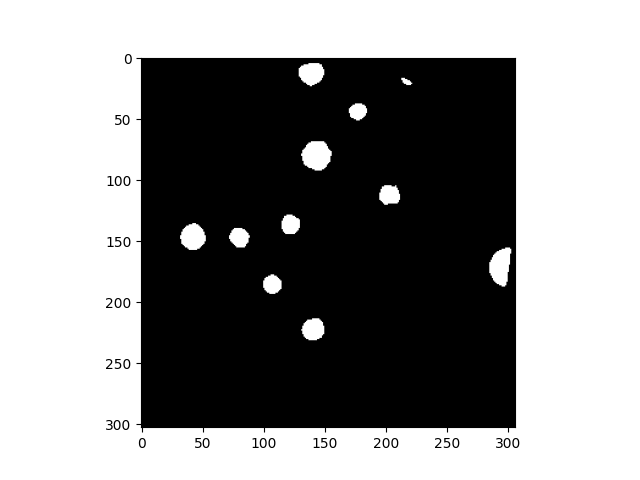

11


In [6]:
#Las colonias de bacteriacon mascara binaria blanco y negro
mask = blurred_image < 0.2
fig, ax = plt.subplots()
plt.imshow(mask, cmap="gray")
plt.show()

labeled_image, count = skimage.measure.label(mask, return_num=True)
print(count)

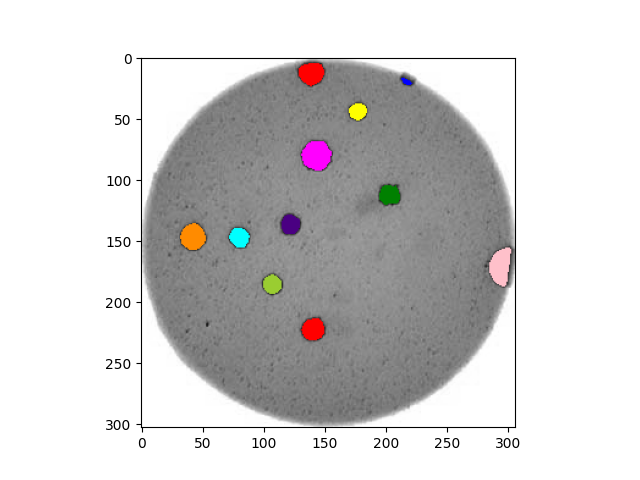

In [7]:
# cada colonia de basterias representada en colores
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
# give our grayscale image rgb channels, so we can add the colored colonies
summary_image = skimage.color.gray2rgb(gray_bacteria)
summary_image[mask] = colored_label_image[mask]

#mostras las colonias de bacterias identificadas
fig, ax = plt.subplots()
plt.imshow(summary_image)
plt.show()


There are 11 colonies in colonies-01.tif
There are 74 colonies in colonies-02.tif
There are 333 colonies in colonies-03.tif


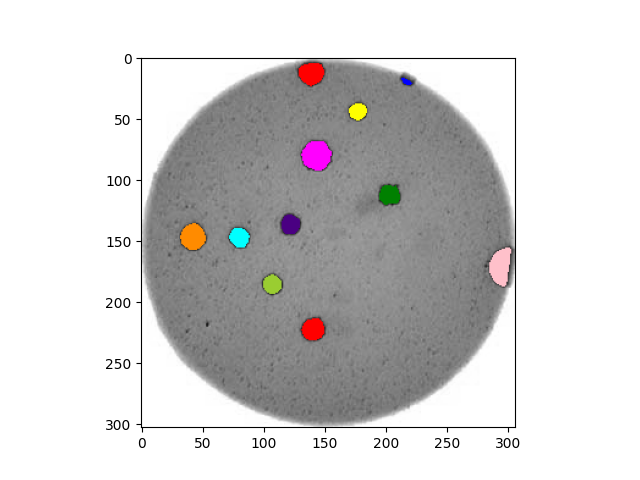

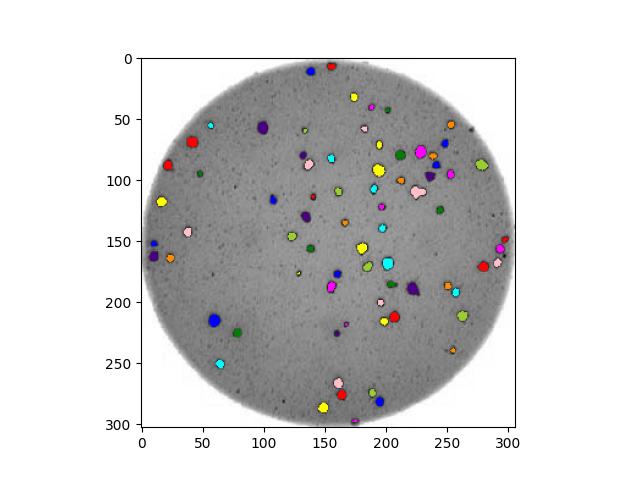

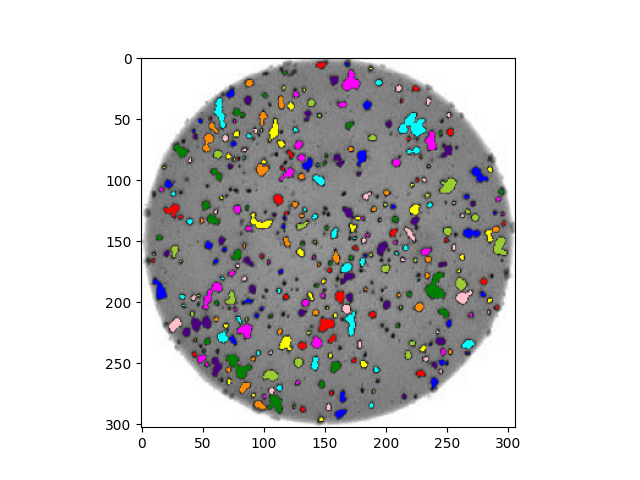

In [4]:
#finalemte crear una funcion para manejar varias imagenes a la vez
def count_colonies(image_filename):
    bacteria_image = skimage.io.imread(image_filename)
    gray_bacteria = skimage.color.rgb2gray(bacteria_image)
    blurred_image = skimage.filters.gaussian(gray_bacteria, sigma=1.0)
    mask = blurred_image < 0.2
    labeled_image, count = skimage.measure.label(mask, return_num=True)
    print(f"There are {count} colonies in {image_filename}")

    colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
    summary_image = skimage.color.gray2rgb(gray_bacteria)
    summary_image[mask] = colored_label_image[mask]
    fig, ax = plt.subplots()
    plt.imshow(summary_image)
    
    
    
for image_filename in ["colonies-01.tif", "colonies-02.tif", "colonies-03.tif"]:
    
    count_colonies(image_filename=image_filename)